# Predict Diabetes with Machine Learning
Diabetes Mellitus is among critical diseases and lots of people are suffering from this disease. Age, obesity, lack of exercise,  hereditary  diabetes,  living  style,  bad  diet,  high  blood  pressure,  etc.  can  cause  Diabetes  Mellitus. People  having diabetes have high risk of diseases like heart disease, kidney disease, stroke, eye problem, nerve damage, etc. Current  practice  in  hospital  is  to  collect  required  information  for  diabetes  diagnosis  through  various  tests  and  appropriate  treatment  is  provided  based  on  diagnosis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(f"Dimension of diabetes data: {df.shape}")

Dimension of diabetes data: (768, 9)


In [4]:
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

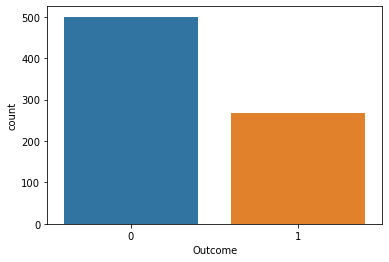

In [5]:
sns.countplot(df['Outcome'], label = "Count")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## K-Nearest Neighbors to Predict Diabetes

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [16]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df.iloc[:,8].values

In [17]:
X_train, X_test, y_train, y_test =  train_test_split(X, y)

In [18]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
metrics.accuracy_score(y_test, y_predict)

0.71875

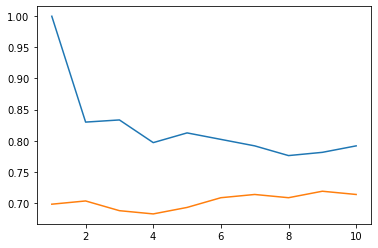

In [19]:
training_accuracy = []
test_accuracy = []
neighbors = range(1,11)
for n_neighbors in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors, training_accuracy, label = "training accuracy")
plt.plot(neighbors, test_accuracy, label = "test accuracy")
plt.show()

In [25]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
print(f"Training Accuracy: {knn.score(X_train, y_train)}")
print(f"Testing Accuracy: {knn.score(X_test, y_test)}")

Training Accuracy: 0.78125
Testing Accuracy: 0.71875


## Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print(f"Accuracy on Training Set: {tree.score(X_train, y_train)}")
print(f"Accuracy on Testing Set: {tree.score(X_test, y_test)}")

Accuracy on Training Set: 1.0
Accuracy on Testing Set: 0.7083333333333334


In [28]:
tree = DecisionTreeClassifier(max_depth = 3,random_state = 0)
tree.fit(X_train, y_train)
print(f"Accuracy on Training Set: {tree.score(X_train, y_train)}")
print(f"Accuracy on Testing Set: {tree.score(X_test, y_test)}")

Accuracy on Training Set: 0.8055555555555556
Accuracy on Testing Set: 0.734375


In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
auto_weighted_prediction = knn.predict(X_test)
recall_score(y_test, auto_weighted_prediction, average='weighted')


0.71875